In [32]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import (MinMaxScaler, StandardScaler)
from sklearn.model_selection import (train_test_split, StratifiedKFold, StratifiedShuffleSplit)
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import (SVC)

from sklearn.pipeline import (make_pipeline, make_union,)
from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix)

import os
from tqdm import tqdm

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
class CLASS():
    FAKE = 1
    REAL = 0

In [35]:
PATH_DUMP = "./object dump/rose-youtu"
assert os.path.exists(PATH_DUMP), "Path does not exist"

In [29]:
FILE = 'wt_YCC_3lv_db11'

A = np.load(os.path.join(PATH_DUMP, FILE+".npy"))
b = np.load(os.path.join(PATH_DUMP, FILE+"_label.npy"))
folder = np.load(os.path.join(PATH_DUMP, FILE+"_folder.npy"))
att_type = np.load(os.path.join(PATH_DUMP, FILE+"_att_type.npy"))

In [36]:
FILE = "wt_BGR_3lv_db5"
FILE2 = "lbp_HSV"
assert np.all(np.load(os.path.join(PATH_DUMP, FILE+"_label.npy")) == np.load(os.path.join(PATH_DUMP, FILE2+"_label.npy"))), "Different order"

A = np.concatenate((np.load(os.path.join(PATH_DUMP, FILE+".npy")),
                    np.load(os.path.join(PATH_DUMP, FILE2+".npy"))),
                   axis=1)
b = np.load(os.path.join(PATH_DUMP, FILE+"_label.npy"))
folder = np.load(os.path.join(PATH_DUMP, FILE+"_folder.npy"))
att_type = np.load(os.path.join(PATH_DUMP, FILE+"_att_type.npy"))
A.shape

(67500, 119)

### KFold

In [37]:
def kfold(_estimator):
    # print(_estimator)
    
    kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    score = 0
    for k, (i_train, i_test) in enumerate(kf.split(A, att_type)):
        model = _estimator.fit(A[i_train,], b[i_train])

        y_pred = model.predict(A[i_test,])
        acc = accuracy_score(y_true=b[i_test], y_pred=y_pred)
        score += acc

        print("[Fold {}] Acc: {:.3f}".format(k+1, acc))
        # print(classification_report(y_true=b[i_test], y_pred=y_pred))

    print("Mean acc: {:.3f}\n".format(score/kf.get_n_splits()))

In [38]:
pipe = make_pipeline(StandardScaler(), SVC())
kfold(pipe)

[Fold 1] Acc: 0.990
[Fold 2] Acc: 0.990
[Fold 3] Acc: 0.990
Mean acc: 0.990



### Single domain testing

In [22]:
A_train, A_test, b_train, b_test = train_test_split(A, att_type,
                                                    train_size=0.8,
                                                    random_state=42,
                                                    stratify=att_type)

In [23]:
pipe = make_pipeline(StandardScaler(), SVC())
pipe = pipe.fit(A_train, b_train)

In [24]:
b_pred = pipe.predict(A_test)
print(classification_report(b_test, b_pred))

              precision    recall  f1-score   support

           m       0.99      0.99      0.99      4100
           p       0.99      0.99      0.99      3980
           r       0.98      0.98      0.98      2500
           v       0.99      0.99      0.99      2920

    accuracy                           0.99     13500
   macro avg       0.99      0.99      0.99     13500
weighted avg       0.99      0.99      0.99     13500



In [ ]:
'''
wt_YCC
              precision    recall  f1-score   support

           m       0.89      0.91      0.90      4100
           p       0.89      0.94      0.92      3980
           r       0.83      0.71      0.77      2500
           v       0.85      0.85      0.85      2920

    accuracy                           0.87     13500
   macro avg       0.86      0.86      0.86     13500
weighted avg       0.87      0.87      0.87     13500

lbp_HSV
              precision    recall  f1-score   support

           m       0.99      0.99      0.99      4100
           p       0.99      0.99      0.99      3980
           r       0.98      0.98      0.98      2500
           v       0.99      0.99      0.99      2920

    accuracy                           0.99     13500
   macro avg       0.99      0.99      0.99     13500
weighted avg       0.99      0.99      0.99     13500

'''

In [28]:
attack_type_list = ('r', 'm', 'p', 'v')
print(confusion_matrix(b_test, b_pred))

# for att in attack_type_list:
    # cond = b_test == att
    # print(att, np.count_nonzero(cond), np.unique(b_pred[cond], return_counts=True))

[[4070   13    8    9]
 [   7 3950   20    3]
 [  17   26 2448    9]
 [   1    1   15 2903]]


In [ ]:
'''
wt_YCC
r 2500 (array(['m', 'p', 'r', 'v'], dtype='<U1'), array([ 277,  202, 1786,  235]))
m 4100 (array(['m', 'p', 'r', 'v'], dtype='<U1'), array([3737,  111,  150,  102]))
p 3980 (array(['m', 'p', 'r', 'v'], dtype='<U1'), array([  65, 3760,   51,  104]))
v 2920 (array(['m', 'p', 'r', 'v'], dtype='<U1'), array([ 140,  130,  167, 2483]))

lbp_HSV
r 2500 (array(['m', 'p', 'r', 'v'], dtype='<U1'), array([  17,   26, 2448,    9]))
m 4100 (array(['m', 'p', 'r', 'v'], dtype='<U1'), array([4070,   13,    8,    9]))
p 3980 (array(['m', 'p', 'r', 'v'], dtype='<U1'), array([   7, 3950,   20,    3]))
v 2920 (array(['m', 'p', 'r', 'v'], dtype='<U1'), array([   1,    1,   15, 2903]))

'''

In [47]:
splitter = StratifiedShuffleSplit(2, test_size=0.2, random_state=42)
split_idx = splitter.split(A, att_type)

In [48]:
i_train, i_test = next(split_idx)

In [49]:
pipe = make_pipeline(StandardScaler(), SVC())
pipe = pipe.fit(A[i_train], b[i_train])

In [50]:
b_pred = pipe.predict(A[i_test])
print(classification_report(b[i_test], b_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2500
           1       0.99      0.99      0.99     11000

    accuracy                           0.99     13500
   macro avg       0.98      0.98      0.98     13500
weighted avg       0.99      0.99      0.99     13500



In [ ]:
# prediction = pipe.predict(A[i_test])
# attack_type_list = ('r', 'm', 'p', 'v')
# for att in attack_type_list:
#     cond = att_type[i_test] == att
#     A_test = (A[i_test])[cond]
#     b_test = (b[i_test])[cond]
#     b_pred = prediction[cond]
#     print(att)
#     print(classification_report(b_test, b_pred))

### Plot histogram for lbp

In [7]:
first_idx_per_type = {
    'r': 2250,
    'm': 0,
    'p': 4750,
    'v': 3500,
}

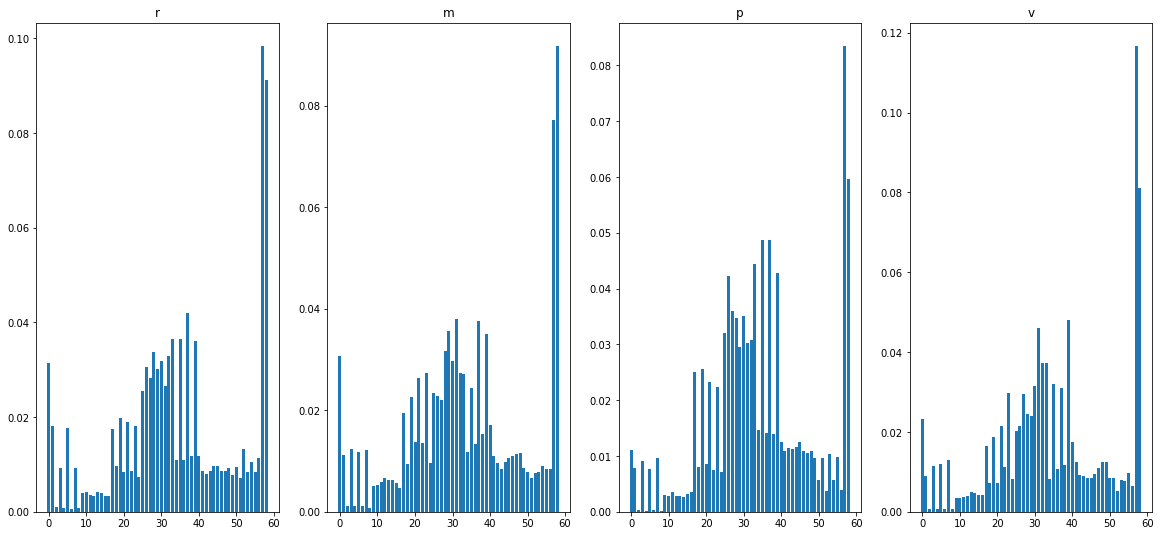

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(20,9))
for i, att in enumerate(first_idx_per_type):
    axs[i].bar(np.arange(59), height=A[first_idx_per_type[att]+1])
    axs[i].set_title(att)